In [ ]:
from google.colab import drive
import os

drive.mount('/content/gdrive/')
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/My Drive/Kaggle'
zipfile = 'hourly-energy-consumption.zip'
extfile = 'time_seriesSubmissioPowerPlant'

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d robikscube/hourly-energy-consumption

hourly-energy-consumption.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile as zf

try:
  extFile = zf.ZipFile(zipfile)
  extFile.extractall(extfile)
  extFile.close()
  print('extraksi dataset selesai')
except(FileExistsError,FileNotFoundError):
  print('Dataset tidak ditemukan')
except:
  print('terjadi kesalahan')
finally:
  print('operation terminated')

extraksi dataset selesai
operation terminated


In [ ]:
os.listdir(extfile)

['AEP_hourly.csv',
 'COMED_hourly.csv',
 'EKPC_hourly.csv',
 'FE_hourly.csv',
 'DEOK_hourly.csv',
 'NI_hourly.csv',
 'PJME_hourly.csv',
 'DOM_hourly.csv',
 'DAYTON_hourly.csv',
 'DUQ_hourly.csv',
 'PJMW_hourly.csv',
 'PJM_Load_hourly.csv',
 'est_hourly.paruqet',
 'pjm_hourly_est.csv']

In [ ]:
dir = os.listdir(extfile)
datasetdir = os.path.join(extfile,'PJME_hourly.csv')

print('Power Plan directory: {}'.format(datasetdir))

Power Plan directory: time_seriesSubmissioPowerPlant/PJME_hourly.csv


In [ ]:
import pandas as pd

loadData_one = pd.read_csv(datasetdir,parse_dates=['Datetime'])
loadData_one

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0
...,...,...
145361,2018-01-01 20:00:00,44284.0
145362,2018-01-01 21:00:00,43751.0
145363,2018-01-01 22:00:00,42402.0
145364,2018-01-01 23:00:00,40164.0


In [ ]:
loadData_one.isnull().sum()

Datetime    0
PJME_MW     0
dtype: int64

In [ ]:
powerplan = loadData_one.rename(columns={'Datetime':'datetime','PJME_MW':'pjm_mw'})

normalizedata = powerplan
powerplantqty = len(normalizedata)
print('banyak dataset: {}'.format(powerplantqty))
normalizedata.head(10)

banyak dataset: 145366


,datetime,pjm_mw
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0
5,2002-12-31 06:00:00,26222.0
6,2002-12-31 07:00:00,28702.0
7,2002-12-31 08:00:00,30698.0
8,2002-12-31 09:00:00,31800.0
9,2002-12-31 10:00:00,32359.0


In [ ]:
dataMae = (max(normalizedata.pjm_mw)-min(normalizedata.pjm_mw))
split1 = 0.10
split2 = 0.032
dataMaesix = int(dataMae * split1)
dataMaetfv = int(dataMae*split2)
mae10 = dataMaesix / 10000
mae06 = dataMaetfv / 10000

print('Skala maximal data: {}'.format(dataMae))
print('skala data {}%: {}'.format((split1*100),dataMaesix))
print('skala data {}%: {}'.format((split2*100),dataMaetfv))
print('skala data {}% mae: {}'.format((split1*100),mae10))
print('skala data {}% mae: {}'.format((split2*100),mae06))

Skala maximal data: 47465.0
skala data 10.0%: 4746
skala data 3.2%: 1518
skala data 10.0% mae: 0.4746
skala data 3.2% mae: 0.1518


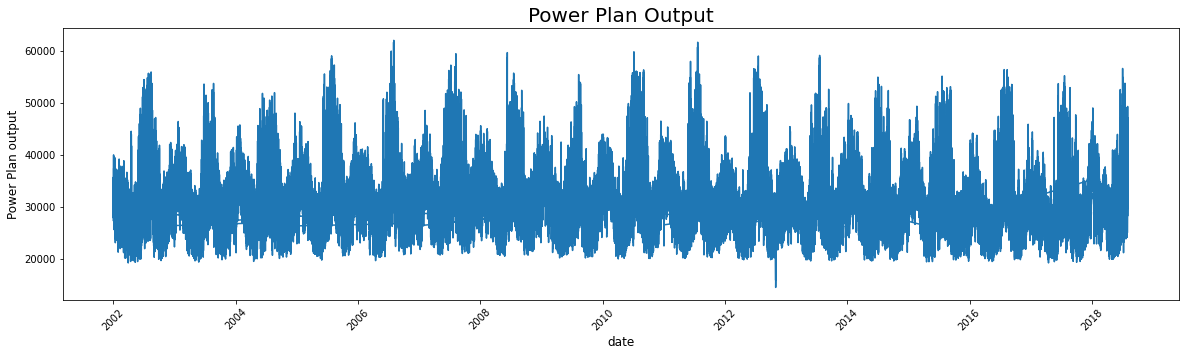

In [ ]:
import matplotlib.pyplot as plt

datetime = normalizedata.datetime.values
output = normalizedata.pjm_mw.values
Title = 'Power Plan Output'

def plotting(Xaxes=[],Yaxes=[],title=''):
  plt.figure(figsize=(20,5))
  plt.plot(Xaxes,Yaxes)
  plt.xticks(rotation=45)
  plt.title(title,fontsize=20)
  plt.xlabel('date',fontsize=12)
  plt.ylabel('Power Plan output',fontsize=12)
  plt.show()  

plotting(datetime,output,Title)


In [ ]:
normalizedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  145366 non-null  datetime64[ns]
 1   pjm_mw    145366 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 MB


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import datetime

data = normalizedata.values

timePowerPlant = []
PowerOutput = []

for i in range(len(data)):
  timePowerPlant.append(data[i,0])
  PowerOutput.append(data[i,1])

timePowerPlant = pd.DataFrame({'datetime':timePowerPlant})
PowerOutput = pd.DataFrame({'pjm_mw':PowerOutput})

def normalize(normalData):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    dates_scaled = scaler.fit_transform(normalData.values)
    return dates_scaled


time = normalize(timePowerPlant)
pwr = normalize(PowerOutput)  
timeFinal = []
pwrFinal = []
for i in range(len(time)):
  timeFinal.append(time[i,0])
  pwrFinal.append(pwr[i,0])

finalDataPowerPlant = pd.DataFrame({'datetime':timeFinal ,'pjm_kw':pwrFinal})

finalDataPowerPlant

,datetime,pjm_kw
0,-0.879827,-0.496303
1,-0.879814,-0.553229
2,-0.879800,-0.577373
3,-0.879786,-0.584999
4,-0.879772,-0.565322
...,...,...
145361,0.929624,0.253134
145362,0.929638,0.230675
145363,0.929652,0.173833
145364,0.929666,0.079532


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

tscv = TimeSeriesSplit(n_splits=4)#20% validation
data = finalDataPowerPlant.values

for tr_index,val_index in tscv.split(finalDataPowerPlant):
  traindata,testdata = pd.DataFrame({'datetime':data[tr_index,0],'pjm_mw':data[tr_index,1]}) , pd.DataFrame({'datetime':data[val_index,0],'pjm_mw':data[val_index,1]})  
n_steps = 1
n_feature = 1

data_train = traindata.pjm_mw.values
data_val = testdata.pjm_mw.values

lenData = len(finalDataPowerPlant)
print('total dataset awal: {}'.format(lenData))
print('train data qty: {}'.format(len(traindata)))
print('test data qty : {}'.format(len(testdata)))

total dataset awal: 145366
train data qty: 116293
test data qty : 29073


In [ ]:
traindata.shape

(116293, 2)

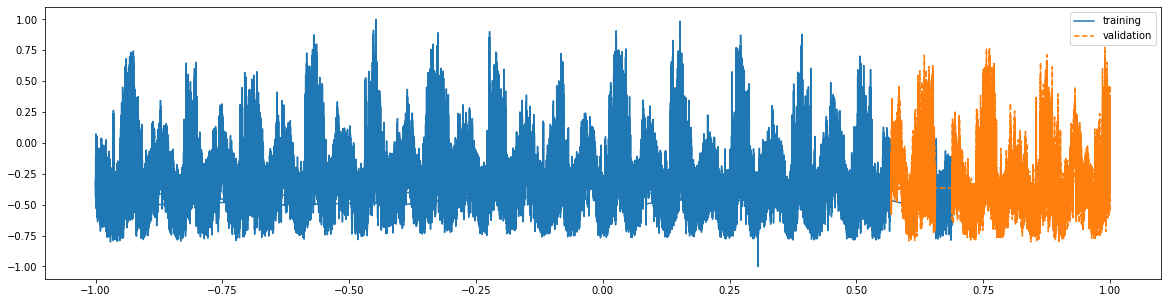

In [ ]:
datetimeT = traindata.datetime.values
powerT = traindata.pjm_mw.values
datetimeTs = testdata.datetime.values
powerTs = testdata.pjm_mw.values

plt.figure(figsize=(20,5))
plt.plot(datetimeT,powerT,label='training')
plt.plot(datetimeTs,powerTs,linestyle='dashed',label='validation')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras


def windowed_dataset(series,windows_size,batch_size,shuffle_buffer):
  series = tf.expand_dims(series,axis=-1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(windows_size + 1, shift=1, drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(windows_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:1], w[1:]))
  return ds.batch(batch_size).prefetch(1)

train_pwr_set = windowed_dataset(data_train,windows_size=6,batch_size=100,shuffle_buffer=1000)
test_pwr_set = windowed_dataset(data_val,windows_size=6,batch_size=100,shuffle_buffer=1000)

train_pwr_set.element_spec

(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None),
 TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber

model = Sequential()
model.add(Bidirectional(LSTM(1024,activation='relu',return_sequences=True),input_shape=(n_steps,n_feature)))
model.add(Bidirectional(LSTM(1024,activation='relu', return_sequences=True)))
model.add(Bidirectional(LSTM(512,activation='relu', return_sequences=True)))
model.add(Bidirectional(LSTM(512,activation='relu', return_sequences=True)))
model.add(Bidirectional(LSTM(60,activation='relu')))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1))

optimizer = Adam(lr=1.000e-04)

model.compile(
    loss = Huber(),
    optimizer = optimizer,
    metrics=['mae']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_10 (Bidirectio (None, 1, 2048)           8404992   
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 1, 2048)           25174016  
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 1, 1024)           10489856  
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 1, 1024)           6295552   
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 120)               520800    
_________________________________________________________________
flatten_2 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)             

In [ ]:
import tensorflow as tf
MAE_TRESHOLD = mae06

class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('mae') < MAE_TRESHOLD):
      print('\n  MAE < {} or {}% Scala Dataset.\n End the Training.'.format(MAE_TRESHOLD,(split2*100)))
      self.model.stop_training = True
     

callbackval = Callback()
saveLog =  tf.keras.callbacks.CSVLogger('trainingSubmissionTimeSeries(Power_plant)Log.csv',separator=',')

with tf.device('/device:GPU:0'):
  history = model.fit(
                    train_pwr_set,
                    epochs=15,
                    steps_per_epoch=100,
                    validation_steps=20,
                    batch_size=100,
                    validation_data = test_pwr_set,
                    callbacks = [callbackval,saveLog],
                    verbose=1
                    )

model.save('TimeSeriesmodel(PowerPlant).h5')
print('Training selesai')

Epoch 1/15
100/100 [==============================] - 116s 1s/step - loss: 0.0474 - mae: 0.2497 - val_loss: 0.0639 - val_mae: 0.2841
Epoch 2/15
100/100 [==============================] - 114s 1s/step - loss: 0.0323 - mae: 0.2012 - val_loss: 0.0548 - val_mae: 0.2638
Epoch 3/15
100/100 [==============================] - 115s 1s/step - loss: 0.0252 - mae: 0.1725 - val_loss: 0.0337 - val_mae: 0.2112
Epoch 4/15
100/100 [==============================] - 115s 1s/step - loss: 0.0242 - mae: 0.1635 - val_loss: 0.0342 - val_mae: 0.2096
Epoch 5/15
100/100 [==============================] - 116s 1s/step - loss: 0.0215 - mae: 0.1556 - val_loss: 0.0330 - val_mae: 0.2073
Epoch 6/15
100/100 [==============================] - ETA: 0s - loss: 0.0196 - mae: 0.1504
  MAE < 0.1518 or 3.2% Scala Dataset.
 End the Training.
100/100 [==============================] - 115s 1s/step - loss: 0.0196 - mae: 0.1504 - val_loss: 0.0326 - val_mae: 0.2069
Training selesai


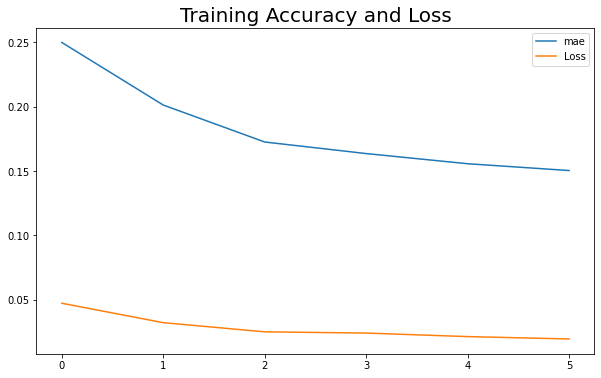

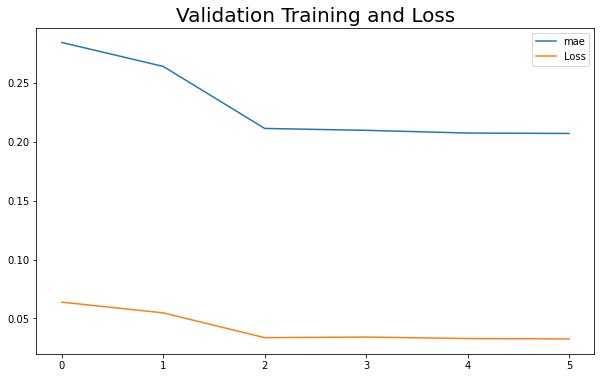

nilai data tertinggi: 47465.0
Actual 10.0% skala data: 4746
Target 3.2% skala data: 1518
MAE 3.2% = 0.1518
MAE 10.0% = 0.4746
MAE < 10.0% = True


In [38]:
mae = history.history['mae']
loss = history.history['loss']
epoch = range(len(mae))
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']


def Trainplotting(Xaxes=[],Yaxes=[],Yval =[],title=''):
  plt.figure(figsize=(10,6))
  plt.plot(Xaxes,Yaxes,label='mae')
  plt.plot(Xaxes, Yval,label='Loss')
  plt.legend()
  plt.title(title,fontsize=20)
  plt.show()
 
Trainplotting(epoch,mae,loss,title='Training Accuracy and Loss')
print('\n\n')
Trainplotting(epoch,val_mae,val_loss,title='Validation Training and Loss')

mae_bool = True if mae[len(epoch)-1] < mae10 else False
print('nilai data tertinggi: {}'.format(dataMae))
print('Actual {}% skala data: {}'.format((split1*100),dataMaesix))
print('Target {}% skala data: {}'.format((split2*100),dataMaetfv))
print('MAE {}% = {}'.format((split2*100),mae06))
print('MAE {}% = {}'.format((split1*100),mae10))
print('MAE < {}% = {}'.format((split1*100),mae_bool)) 